# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [38]:
import math

# find the orientation of three 2D points - to see if the rotation from points is counterclockwise or clockwise based on the middle point (p2)
def orientation(p1 : tuple[int,int],p2 : tuple[int,int] ,p3: tuple[int,int]) -> int:
        # find the difference of the gradients between p3 and p2, and p2 and p1, to check the orientation
        grad_diff = ((p3[1]-p2[1])*(p2[0]-p1[0])) - ((p2[1]-p1[1])*(p3[0]-p2[0]))
        
        # check if the orientation is counterclockwise (so return 1) - as we prefer the orientation to be counterclockwise in the Jarvis March algorithm.
        if grad_diff > 0:
                return 1
        # check if the orientation is clockwise (so return -1)
        elif grad_diff < 0:
                return -1
        # otherwise the orientation will be collinear (so return 0) - so there is no slope but a straight line
        else:
                return 0
def dist(p1 : tuple[int,int], p2: tuple[int,int]) -> float:
        return math.sqrt((p2[1]-p1[1])**2 +(p2[0]-p1[0])**2)

# tutorial: https://www.youtube.com/watch?v=nBvCZi34F_o
def jarvismarch(inputSet : list[tuple[int,int]]) -> list[tuple[int,int]]:
    '''
    Returns the list of points that lie on the convex hull (jarvis march algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    # find the left-most point
    if len(inputSet) < 3:
        return inputSet

    leftmostPoint = min(inputSet)
    outputSet = []
    while True:
        outputSet.append(leftmostPoint)
        next_point = inputSet[0]
        for point in inputSet:
                rotation = orientation(leftmostPoint, next_point, point)
                # check if the rotation is counterclockwise, where the first point is the next point in the hull, otherwise if rotation is collinear, then check the distance between the leftmost point and the next point, and if the distance is greater than the distance between the leftmost point and the current point, then the next point is the current point.
                if next_point == leftmostPoint or rotation == 1 or (rotation == 0 and dist(leftmostPoint, point) > dist(leftmostPoint,next_point)):
                        next_point = point
        
        # now check for the next point after finding the point that is on the convex hull                
        leftmostPoint = next_point
        # check if the algorithm returns back to the starting point and then end the loop, returning the coordinates of the hull.
        if leftmostPoint == outputSet[0]:
                # convex hull is complete
                break  

    #ADD YOUR CODE HERE

    return outputSet

jarvismarch([(2,2),(3,1),(4,-4),(-1,-6),(-3,4),(1,1)])

[(-3, 4), (2, 2), (3, 1), (4, -4), (-1, -6)]

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [39]:
# Graham Scan Algorithm is taken from Chapter 33 of Introduction to Algorithms (3rd Edition) by Cormen et al. (2009). Python implementation is based on the pseudocode provided in the book.

# function to get the polar angle between two points in 2D space - to determine the angle between the x-axis and the line segment connecting the two points, used for sorting the points in the graham scan algorithm.
def getPolarAngle(v1 : tuple[int, int], v2 : tuple[int, int]) -> float:
# calculate the polar angle
        polarAngle = math.atan2(v2[1] - v1[1], v2[0] - v1[0])
        
        # if the polar angle is negative, then add 2pi to the angle to make it positive, so it is in the range of 0 to 2pi (following polar coordinates convention).
        if polarAngle < 0:
                polarAngle += (2 * math.pi)
        
        return polarAngle

# function to get the distance between two points in 2D space.
def getDistance(v1 : tuple[int,int],v2 : tuple[int,int]) -> float:
    return math.sqrt((v2[0]-v1[0])**2 + (v2[1]-v1[1])**2)


# cross product is used to determine whether consctuive segments turn left or right or are collinear (straight).
def crossProduct(v1 : tuple[int,int], v2 : tuple[int,int], v3 : tuple[int,int]) -> float:
    # formula for cross product:
    # (p1 - p0) x (p2 - p0) = (x1 - x0)(y2 - y0) - (y1 - y0)(x2 - x0)
    # positive crossproduct means right turn at p1 (clockwise), negative value means left turn at p1 (counterclockwise), and 0 means collinear
    return (v2[0] - v1[0]) * (v3[1] - v1[1]) - (v2[1] - v1[1]) * (v3[0] - v1[0])

def grahamscan(inputSet : list[tuple[int,int]]) -> list[tuple[int,int]]:
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    # if the inputSet has less than 3 points, then return the inputSet as the convex hull
    if len(inputSet) < 3:
        return inputSet
    
    
    # find the point with the minimum y-coordinate or leftmost point in case of a tie
    p0 = min(inputSet, key=lambda x:(x[1], x[0]))
    
    # Remove p0 from the inputSet
    inputSet.remove(p0)

    """
    let p1, p2,...,pi be the remaining points in Q,
    sorted by polar angle in counterclockwise order around p0
    (if more than one point has the same angle, remove all but
    the one that is farthest from p0)
    """
    # Define a custom sorting function - to sort the points based on the polar angle, and if the polar angle is the same, then sort based on the furthest distance from p0 in the case of a tie
    def custom_sort(v : tuple[int,int]) -> tuple[float,float]:
        return (getPolarAngle(p0, v), getDistance(p0, v))

    # Sort the points based on the custom sorting function
    inputSet = sorted(inputSet, key=custom_sort)

    # Add p0 back to the beginning of the sorted list
    inputSet.insert(0, p0)
    
    # initialize a stack, outputSet, to store the vertices of the convex hull
    outputSet = [p0, inputSet[1], inputSet[2]]

    for i in range(3, len(inputSet)):
        # while the angle formed by points next-to-top(s), top(s) and p_i makes a nonleft turn, pop from stack
        while len(outputSet) > 1 and crossProduct(outputSet[-2], outputSet[-1], inputSet[i]) <= 0:
            outputSet.pop()
        outputSet.append(inputSet[i])
        
    return outputSet

grahamscan([(2,2),(3,1),(4,-4),(-1,-6),(-3,4),(1,1)])

[(-1, -6), (4, -4), (3, 1), (2, 2), (-3, 4)]

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [40]:
"""
Algorithm Hull2D(P, m, H), where P C E^2, 3 <= m <= n, and H >= 1
1. partition P into subsets P_1..... P_[n/m] each of size at most m
2. for i = 1,..., [n/m] do
3.      compute conv(Pi) by Graham's scan and store its vertices in an array
        in ccw order
4. P0 <- (0,-float('inf'))
5. P1 <- the rightmost point of P
6. for k = 1,...,H do
7.      for i = 1,...,[n/m] do
8.              compute the point q_i in P_i that maximizes angle between p_k-1, P_k and q_i (q_i =/= P_k)
                by performing a binary search on the vertices of conv(Pi)
9.      p_k+1 <- the point q from {ql..... qFn/mq}that maximizes Zpk-1Pkq
10.     if p_k+1 = p_i then return the list (p_1..... p_k)
11. return incomplete
"""



def divide_points(inputSet : list[tuple[int,int]], m : int) -> list[list[tuple[int,int]]]:
        subsets = [inputSet[i:i+m] for i in range(0, len(inputSet)+1, m)]
        return subsets

def chen(inputSet):
        '''
        Returns the list of points that lie on the convex hull (chen's algorithm)
                Parameters:
                        inputSet (list): a list of 2D points
        
                Returns:
                        outputSet (list): a list of 2D points
        '''
        # let m = 3
        m = 3
        
        for t in range(m, len(inputSet)):
                # note that h <= m <= h^2 for all h >= 1 in the algorithm - so we do not perform too many iterations
                """
                
                """
                h = 2 ** (2 ** t)
                if h > len(inputSet):
                        return grahamscan(inputSet)  # If h is greater than the number of points, just use Graham's scan

                # Partition the inputset into subsets of size at most m using the divide_points function
                subsets = divide_points(inputSet, h)

                # Compute the convex hull of each subset using Graham's scan
                subhulls = [grahamscan(subset) for subset in subsets]

                # Merge the subhulls using Jarvis's march
                hull = jarvismarch([point for subhull in subhulls for point in subhull])

                if len(hull) <= h:
                        return hull  # If the hull has h or fewer points, it is the correct hull
                else:
                        h += 1
        

chen([(2,2),(3,1),(4,-4),(-1,-6),(-3,4),(1,1)])
         


[(-1, -6), (4, -4), (3, 1), (2, 2), (-3, 4)]

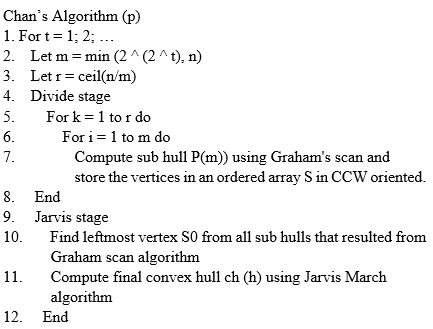
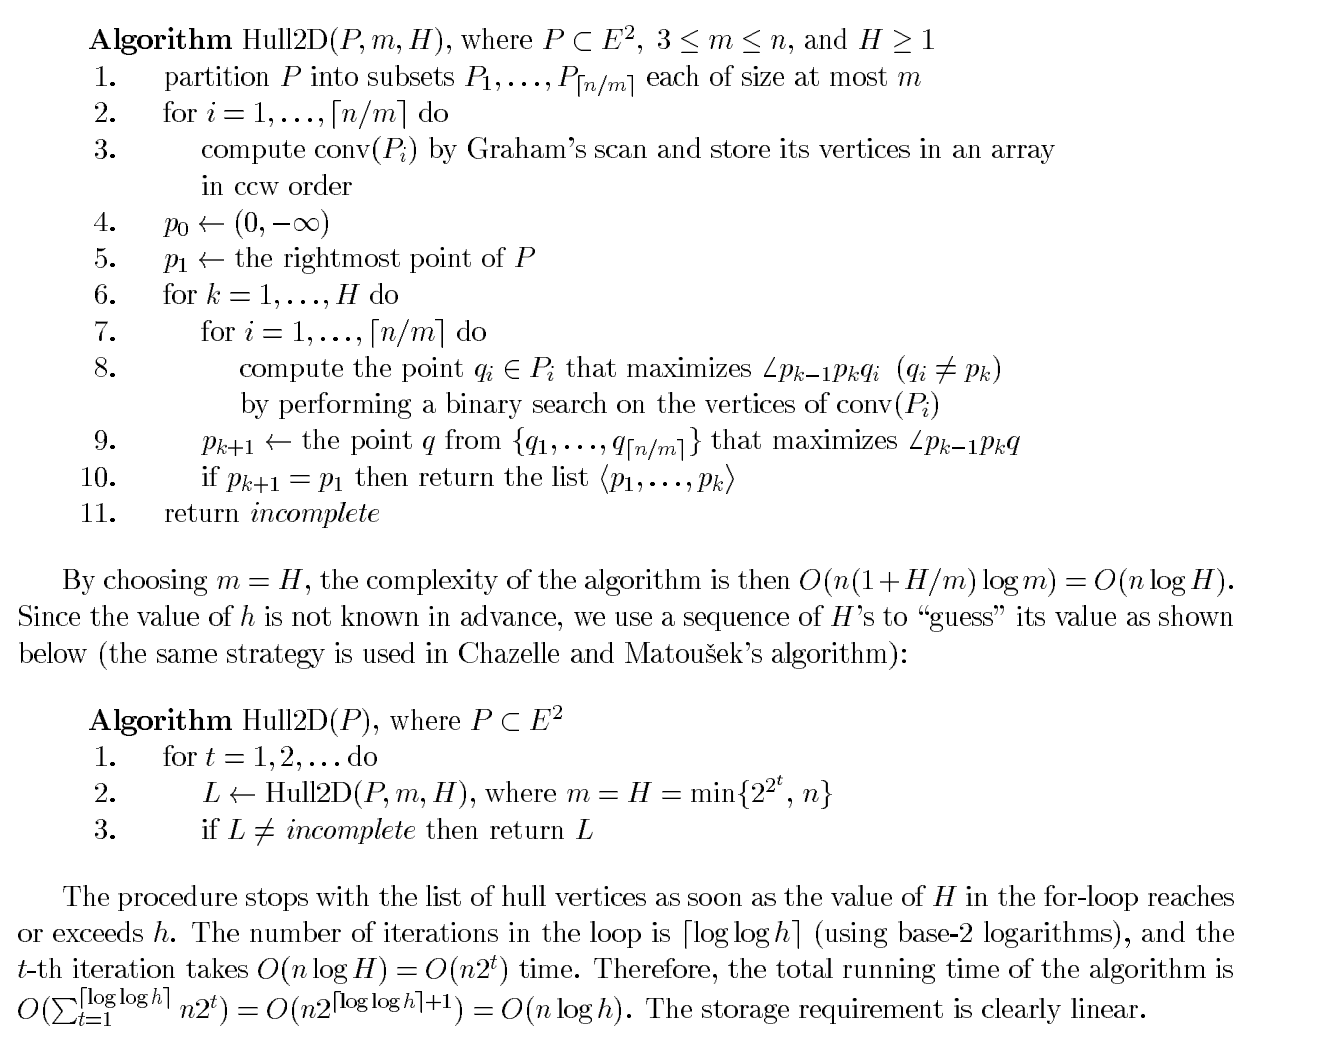

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [41]:
import random
import math

class TestDataGenerator():
    
    
    def __init__(self,num_points,radius=16383):
        self.num_points = num_points
        self.radius = radius
        

    def random_points(self):
        rand_points = []
        for _ in range(self.num_points):
            x = random.randint(0,32767)
            y = random.randint(0,32767)
            rand_points.append((x,y))
        return rand_points
    
    def generate_polygon_points(self,polygon_sides):
        polygon_vertices= []
        if polygon_sides <3:
            raise ValueError("A polygon must have at least 3 sides.")


        for i in range(polygon_sides):
            angle = 2 * math.pi * i / polygon_sides
            x = int(round(16383 + math.cos(angle) * self.radius))
            y = int(round(16383 + math.sin(angle) * self.radius))
            polygon_vertices.append((x, y))

        edge_points = []
        for i in range (polygon_sides):
            start_x, start_y = polygon_vertices[i]
            end_x, end_y = polygon_vertices[(i + 1) % polygon_sides]
            num_of_edge_points = math.ceil(self.num_points / polygon_sides)
            for j in range(num_of_edge_points):
                t = j/num_of_edge_points
                edge_x = start_x + t * (end_x - start_x)
                edge_y = start_y + t * (end_y - start_y)
                edge_points.append((edge_x, edge_y))
        

        return edge_points
    
    def generate_circle_points(self):
        circle_points = []
        centre_x = 0
        centre_y = 0

        for i in range(self.num_points):
            angle = 2 * math.pi * i / self.num_points
            x = int(round(centre_x + self.radius * math.cos(angle)))
            y = int(round(centre_y + self.radius * math.sin(angle)))
            circle_points.append((x, y))

        return circle_points
    
    
    def generate_collinear_points(self):
        grad = random.randint(-5,10)
        rand_points = []
        for i in range(self.num_points):
            x = i
            y = grad * x
            rand_points.append((x,y))
        return rand_points

Use the cell below to implement the requested **experimental framework** API.

In [42]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

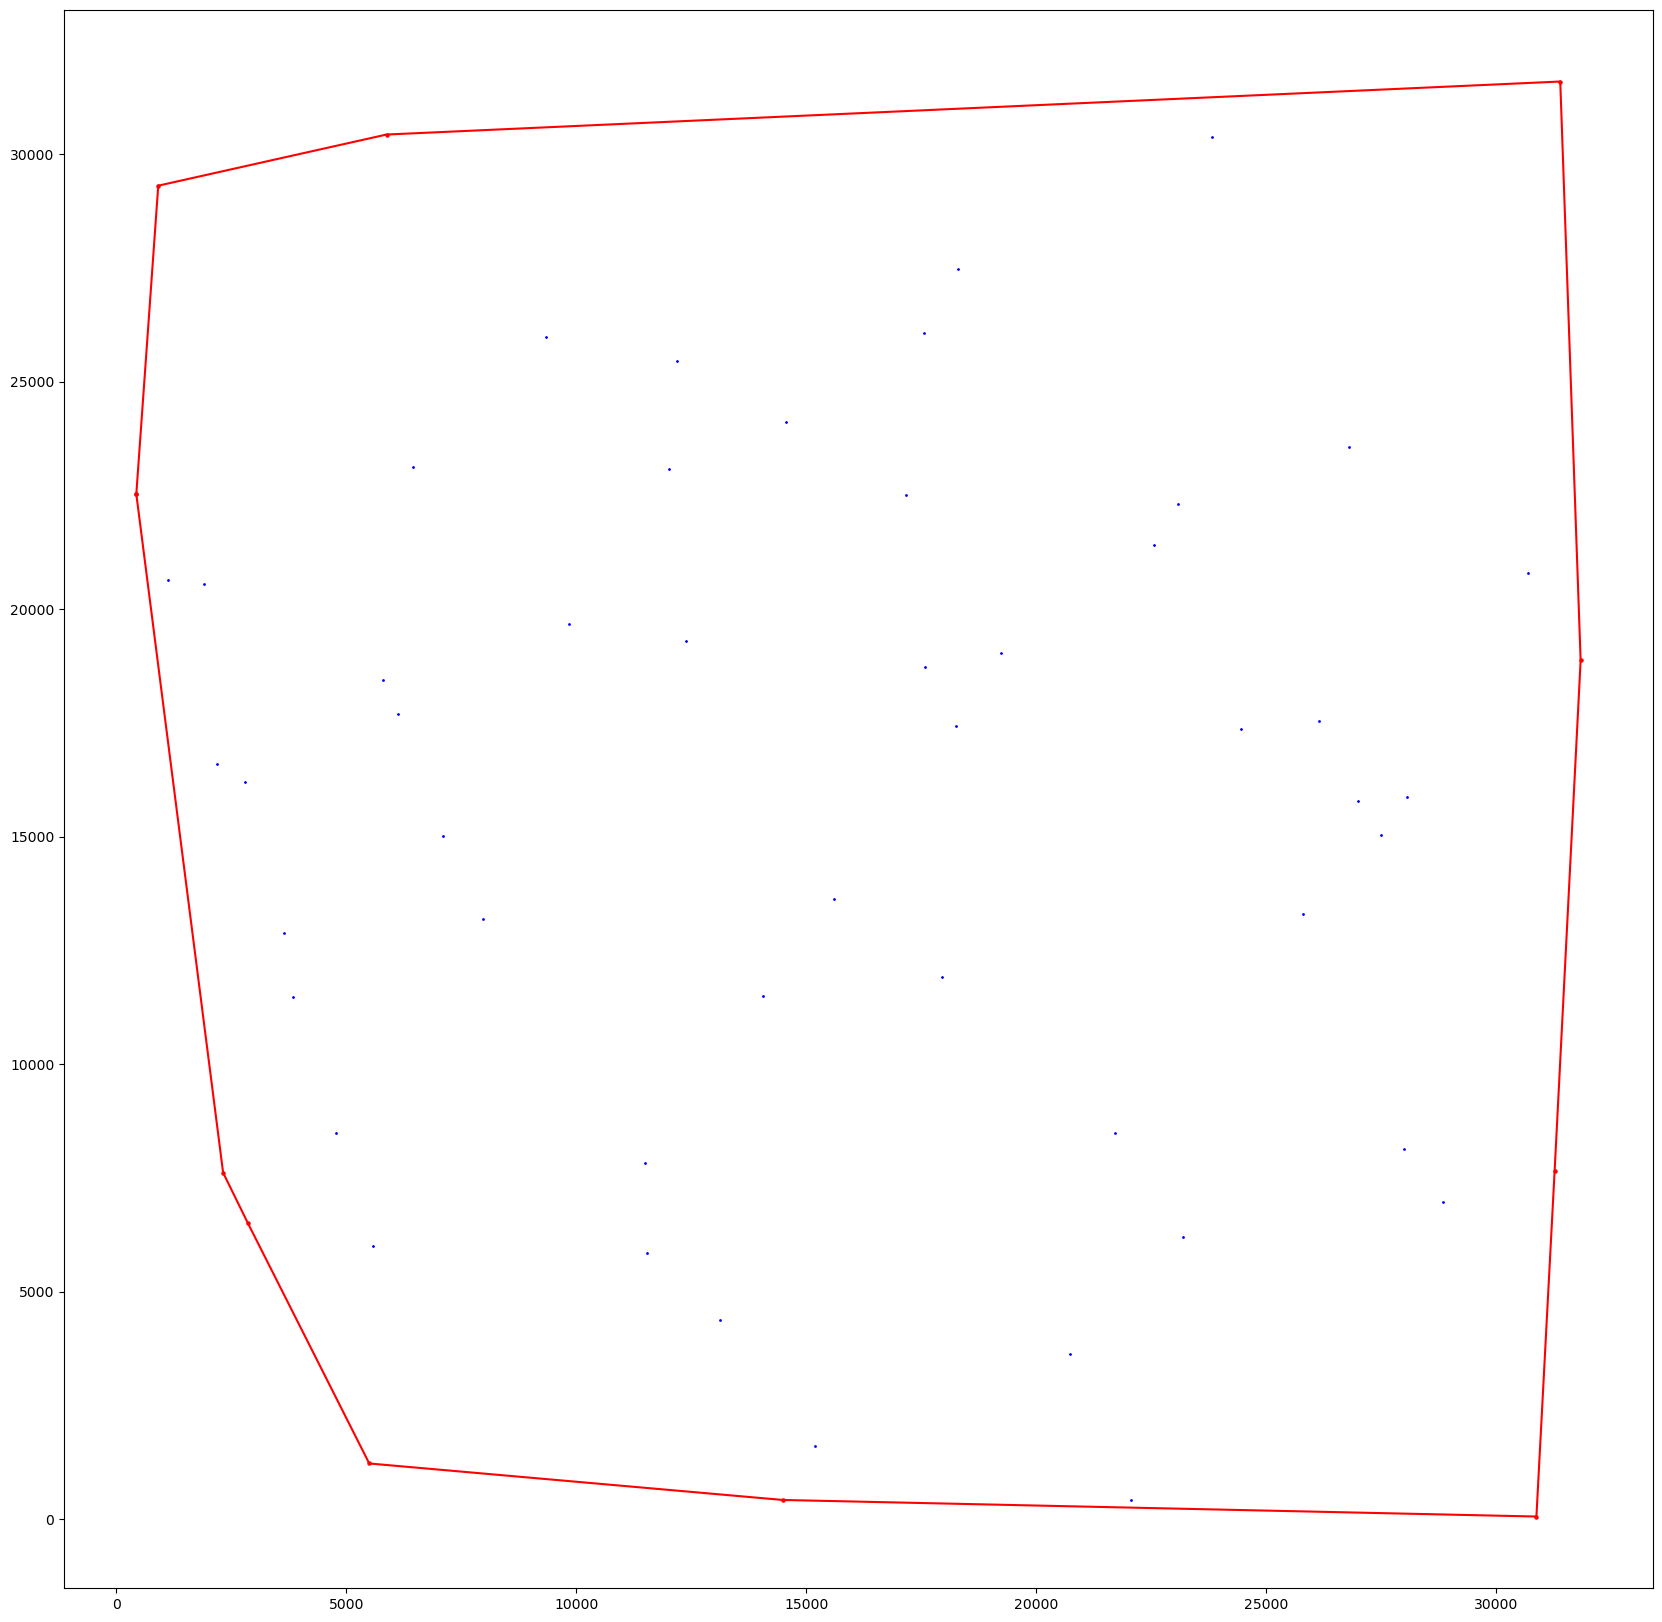

In [43]:
# ADD YOUR TEST CODE HERE 
# ADD YOUR TEST CODE HERE 
# Create an instance of TestDataGenerator
data_generator = TestDataGenerator(60)

# Call the generate_points() method
points = data_generator.random_points()

jarvis_march_points = jarvismarch(points)
jarvis_march_points.append(jarvis_march_points[0])



x = [i[0] for i in points]
y = [i[1] for i in points]

jarvis_x = [i[0] for i in jarvis_march_points]
jarvis_y = [i[1] for i in jarvis_march_points]

plt.scatter(x,y, color = 'blue', s = 1)
plt.scatter(jarvis_x, jarvis_y, color = 'red', s = 5)
plt.plot(jarvis_x, jarvis_y, color = 'red')
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)
plt.show()




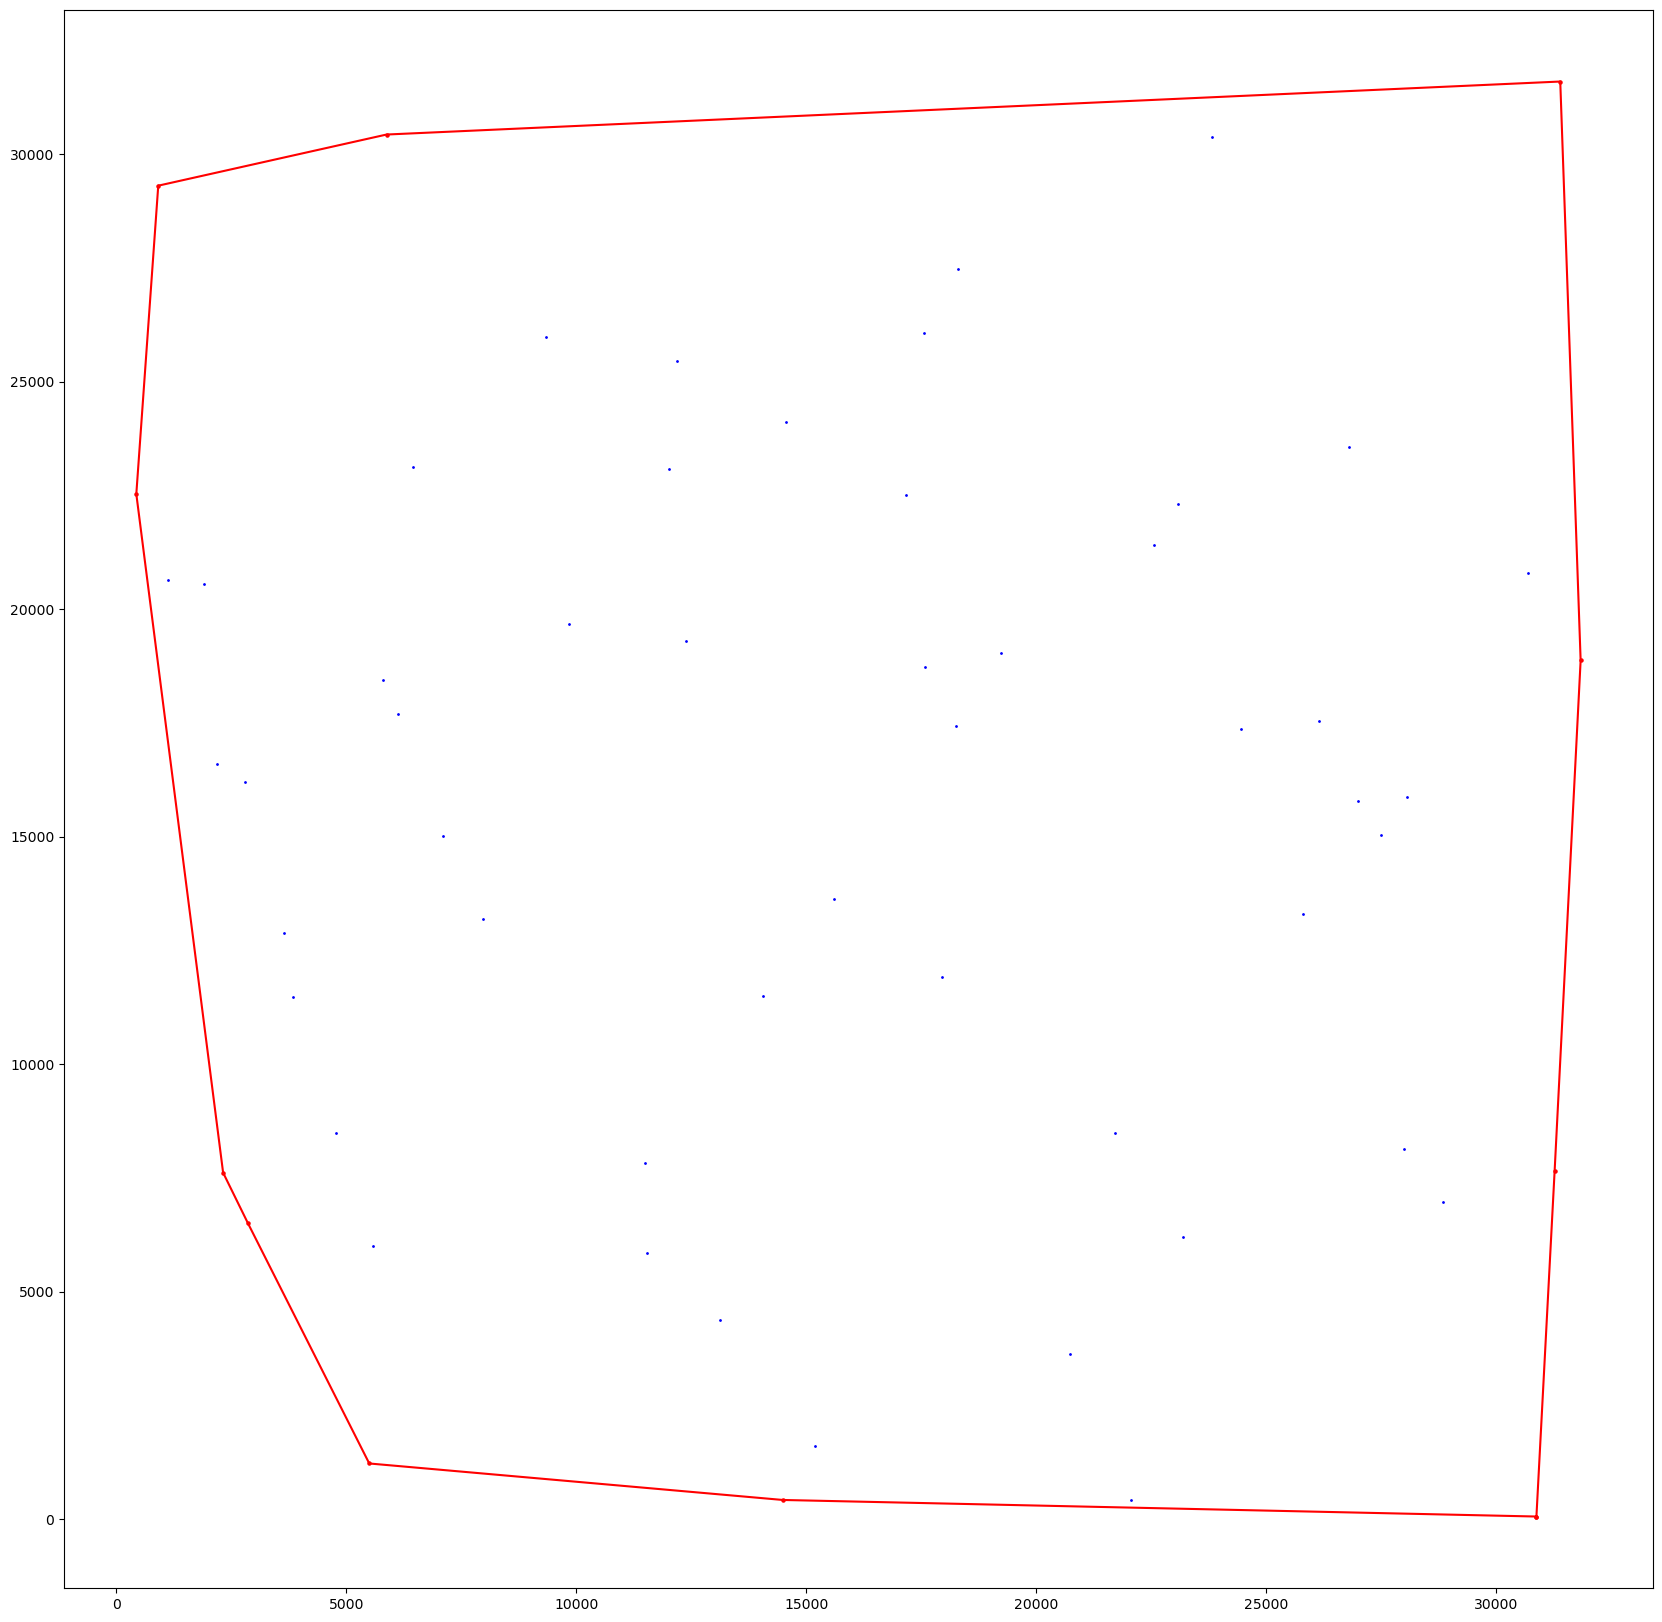

In [44]:
graham_points = grahamscan(points)
graham_points.append(graham_points[0])
graham_x= [i[0] for i in graham_points]
graham_y = [i[1] for i in graham_points]

plt.scatter(x,y, color = 'blue', s = 1)
plt.scatter(graham_x, graham_y, color = 'red', s = 5)
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)
plt.plot(graham_x, graham_y, color = 'red')

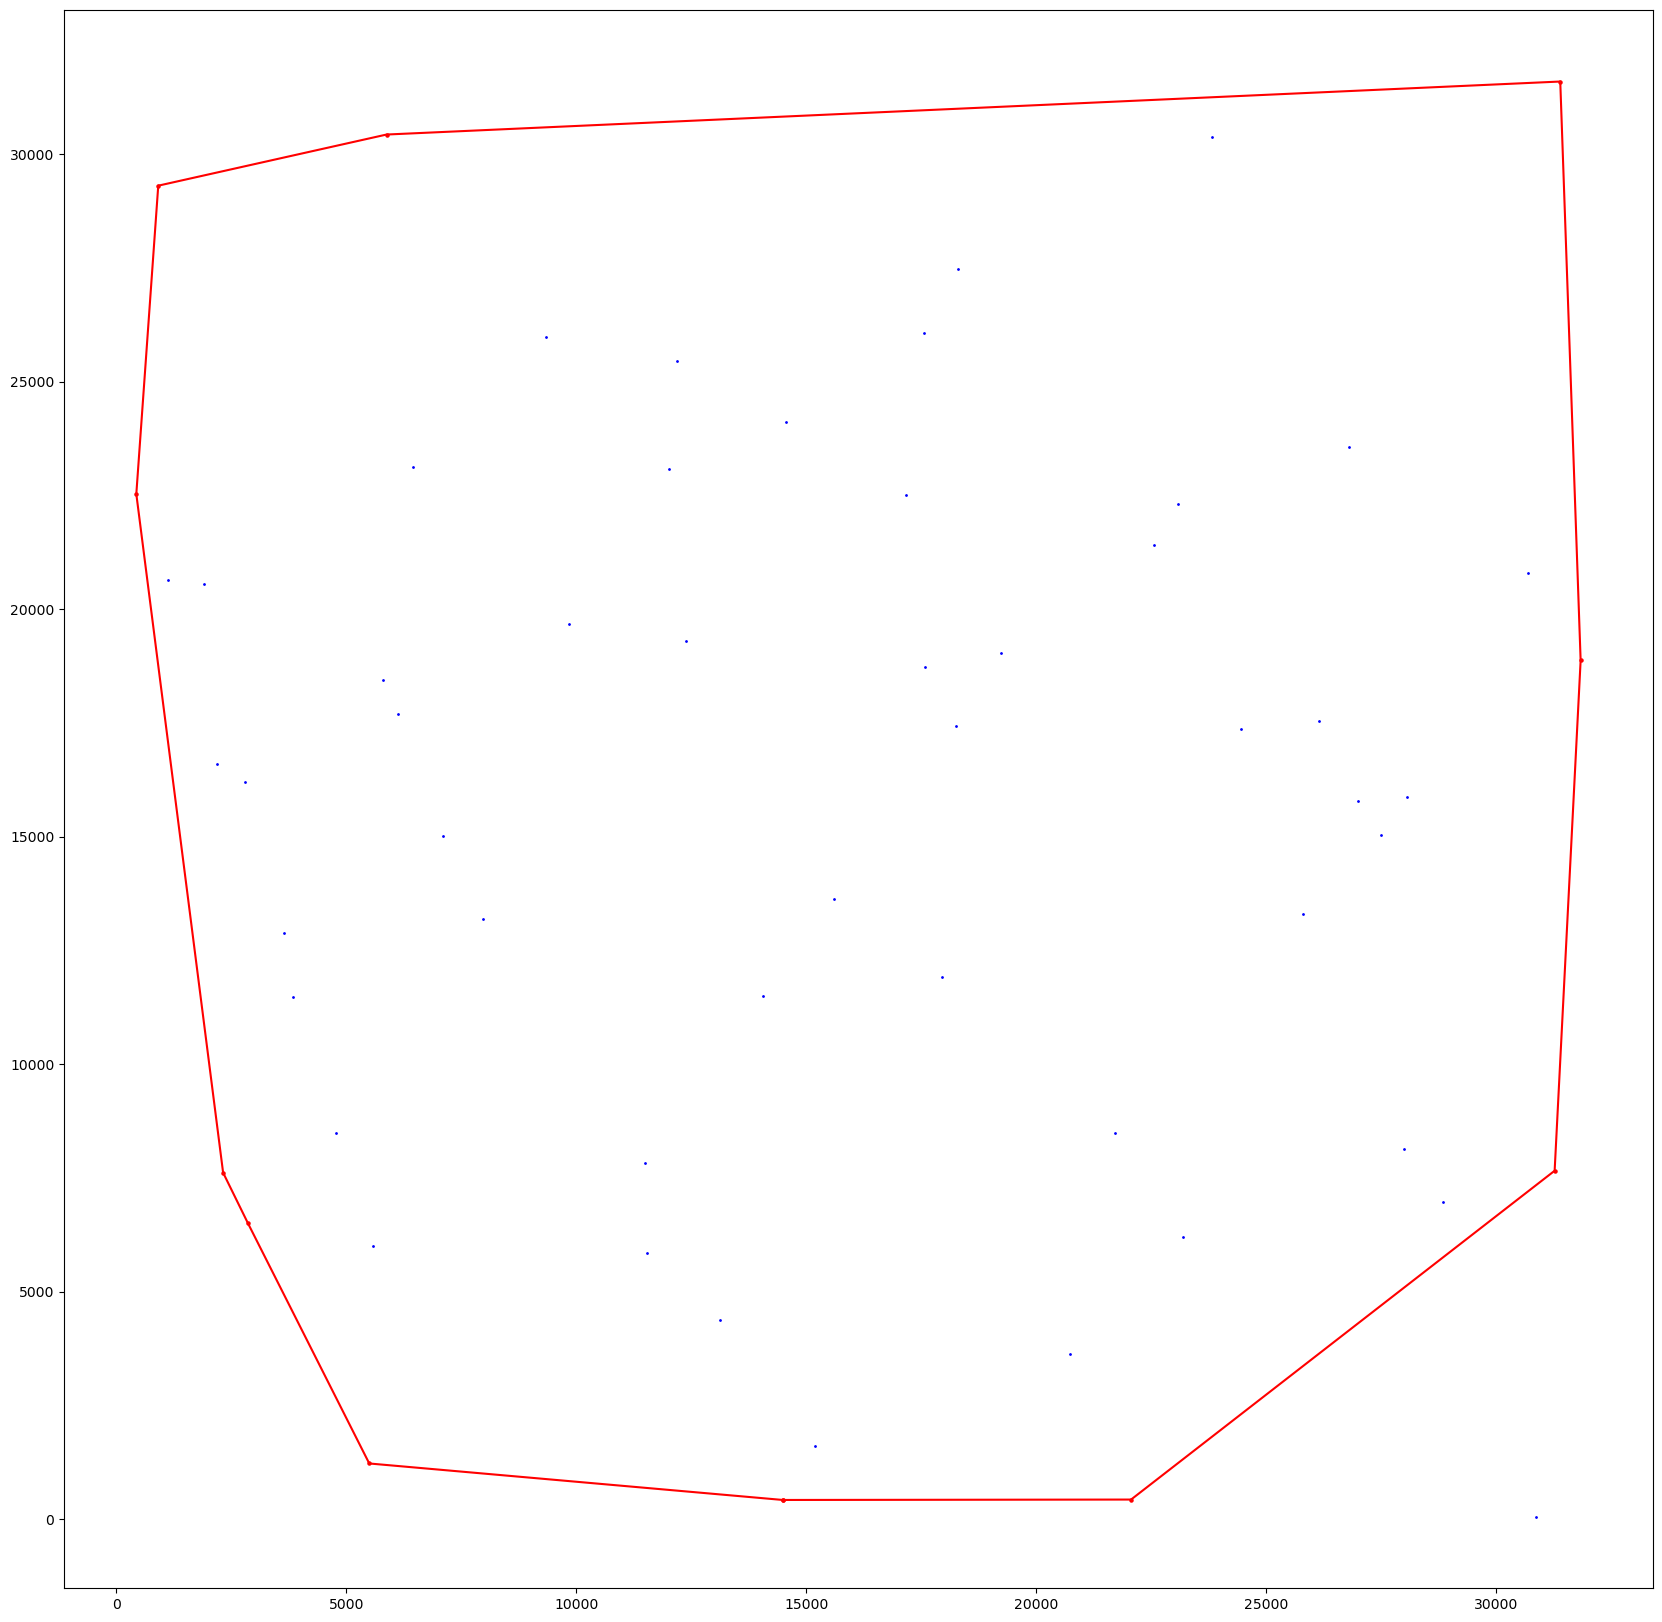

In [45]:
chan_points = chen(points)
chan_points.append(chan_points[0])
chan_x= [i[0] for i in chan_points]
chan_y = [i[1] for i in chan_points]
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)
plt.scatter(x,y, color = 'blue', s = 1)
plt.scatter(chan_x, chan_y, color = 'red', s = 5)
plt.plot(chan_x, chan_y, color = 'red')


In [13]:
print(len(jarvis_march_points) == len(graham_points))

True


In [14]:
print(len(jarvis_march_points))

7


In [135]:
len(chan_points)

10

In [124]:
len(graham_points)

9

In [36]:
def time_algorithm(algorithm, points):
    start = timeit.default_timer()
    algorithm(points)
    end = timeit.default_timer()
    return end - start

jarvis_times = []
graham_times = []
chan_times = []

    
def get_times(point_range):
    for i in point_range:
        data_generator = TestDataGenerator(i)
        points = data_generator.random_points()
        jarvis_times.append(time_algorithm(jarvismarch, points))
        graham_times.append(time_algorithm(grahamscan, points))
        chan_times.append(time_algorithm(chen, points))
        
def trials(point_range, n):
    jarvis_trials = []
    graham_trials = []
    chan_trials = []
    for j in point_range:
        jarvis_time = 0
        graham_time = 0
        chan_time = 0
        for i in range(n):
            data_generator = TestDataGenerator(j)
            points = data_generator.generate_circle_points()
            jarvis_time += time_algorithm(jarvismarch, points)
            graham_time += time_algorithm(grahamscan, points)
            chan_time += time_algorithm(chen, points)
        jarvis_trials.append(jarvis_time/n)
        graham_trials.append(graham_time/n)
        chan_trials.append(chan_time/n)
        
    return jarvis_trials, graham_trials, chan_trials
        
    
point_range = [i for i in range(10, 1000, 100)]
jarvis_trials, graham_trials, chan_trials = trials(point_range, 200)

plt.plot(point_range, jarvis_trials, label = "Jarvis March", color = 'red')
plt.plot(point_range, graham_trials, label = "Graham Scan", color = 'blue')
plt.plot(point_range, chan_trials, label = "Chan's Algorithm" , color = 'green')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/declanloo/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/w0/fm4jsyzj2rv6f2269jdg1h7r0000gn/T/ipykernel_2740/3933869015.py", line 42, in <module>
    jarvis_trials, graham_trials, chan_trials = trials(point_range, 200)
                                                ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w0/fm4jsyzj2rv6f2269jdg1h7r0000gn/T/ipykernel_2740/3933869015.py", line 33, in trials
    chan_time += time_algorithm(chen, points)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/w0/fm4jsyzj2rv6f2269jdg1h7r0000gn/T/ipykernel_2740/3933869015.py", line 3, in time_algorithm
    algorithm(points)
  File "/var/folders/w0/fm4jsyzj2rv6f2269jdg1h7r0000gn/T/ipykernel_2740/1230285716.py", line 52, in chen
    hull = jarvismarch([point for subhull in subhulls for point in subhull])
           ^^^^^^